# BENG 212 HW 2

##  Name: Kinshuk Sahu

### 1/28/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import metrics

data = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Expression Data', index_col = 0)
metadata = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Experimental Conditions', index_col = 0)
gene_info = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Gene Information', index_col = 0)

In [2]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set(style="whitegrid")



## Problem 1: Clustering methods 

(This chapter may be helpful in answering this question: https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf)

### A. Describe:

1) overall clustering criteria

2) required parameters

3) strengths/weaknesses

#### For the following common clustering methods:

A) k-means clustering
K means clustering algorithm, a type of unsupervised learning algorithm , involves first selecting k centroids. Then all the other points are compared for the minimum distance from these centriods, if it is nearest to the 1st centroid it is labelled as 1 and so on. After this a centroid is taken from all the points of a single label, known as a cluster. This goes on iteratively. The clustering criteria is hence based on the minimum distance, this distance can be either Euclidean distance, Manhattan or Minkowski, which mut be choosed accroding to the data, like spherical distributions can be better described with Euclidean distances etc. The required parameters that we must speify before is the number of clusters, K. Since this type of preassignment (known as hard clustering) is not always useful, this is one weakness of the algorithm which can be overcomed using techniques such as finding the silhoutte coefficient or using the elbow method. Other weakness include difficulty in predicting outliers and density based distributions, because in these cases the data's centroid calculation is difficult. 
B) Agglomerative hierarchical clustering
 - include definitions of single, complete, and average linkage
 - this lecture may be helpful: https://www.andrew.cmu.edu/user/achoulde/95791/lectures/lecture07/lecture07_95791.pdf
The algorithm of this type of clustering method works by first treating each point as its own cluster, then two similar clusters are merged into a single cluster, which goes on iteratively to yield a single big cluster containing all the points. The order in which these associations happen give us the dendogram, which shows the heirarchial relation of similarity between two clusters, much like a phylogenetic tree.The first clusters are called the leaves, then combination of two clusters called nodes,and finally they converge to a single root. Hence this approach is a similarity based approach. After selecting the distance metric as descibed in part a, the question arises is from what part of the cluster do we compute the distances. If the distances are computed from the most similar parts then it is known as single linakge. If it is computed between the least similar parts of a cluster(this minimises the diameter of the cluster merger) then it is known as complete linkage, while selecting the centers of clusters gives us the average linkage, which is a balance between the sensitivity of complete linkage vs the intuitive method of single linkage. Either of the three can be used, chosen according to our data.The choice of linkage and the distance metric serve as input parameters of the model too. The strengths of this model is its simple to understand nature, and it is easy to implement it too.Also The outputs can be interpreted pretty easily. But since it is too simple, often  it fails to classify the data properly.Other weaknesses include long computational times to calculate the dendograms and dependency on an essentially arbitary choice of linkage criteria and distance metric. 

C) DBSCAN

DBSCAN which stands for Density-based spatial clustering of applications with noise, uses an algorithm evident from its name. It starts form samples having high density, and then expands from there to form clusters. Its parameters include ε the radius of the neighbourhood of a point and the minimum number of points required to form a cluster.  The ε neighbourhood of the point is analysed to see how many other sample points are in there. If it contains sufficient points then it is classified as a cluster, and points not in a cluster are outliers or noise. Now for one point in a cluster, its ε neighbourhood is investigated to see if the cluster can be extended, in this iterative way one connected cluster is formed. An unvisited point in the sample data is visited next and the same process is applied there to extend the amount of density defined clusters. Its advantages include no prerequirement of no of clusters like K means, able to predict arbitatily shaped clusters,and has noise inbuilt into the definition of the model making it more robust. Some of its disadvantages include expertise required to choose ε and minPts, and difficulty in predicting datasets with large difference in densities. 



D) Gaussian mixture models

Gaussian mixture models define the samples as a mixture of many probability distribution functions, and if the function is Gaussian in nature it is known as a Gaussian mixture model. Now since here the clusters are defined probabilistically, one point can belong to one cluster with a certain probability and to the other cluster with a different probability. This approach is similar to k means, but the difference here is we are incorporating the covariance structure of the data too. The required parameters are the number of components we need to choose, which can be found using the BIC criteria. Strengths of this model arise from its proabilistic nature, there is no biasing to form a particular structure that might or might not be true. Weaknesses include its dependency on the pre defined number of components, and the need to define that properly since it always includes all  of its components. 



### B. Calculate the k-means clusters for Homework_Data for different numbers of clusters. How similar are the clustering patterns? How do the clusters align with sample conditions?

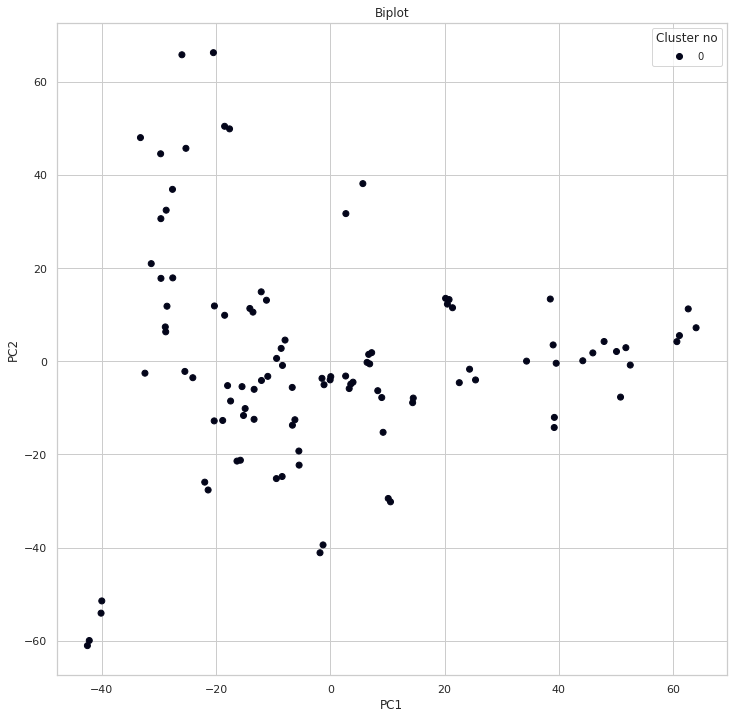

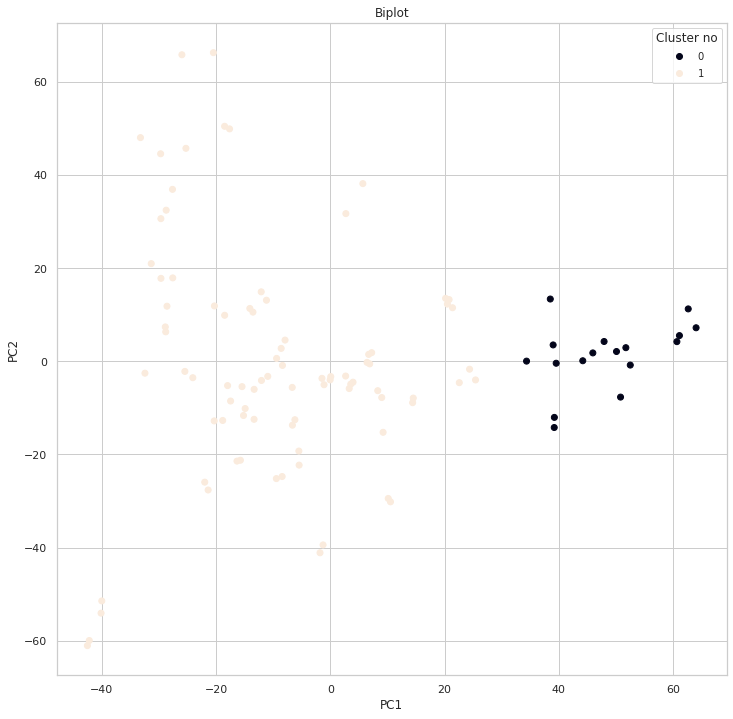

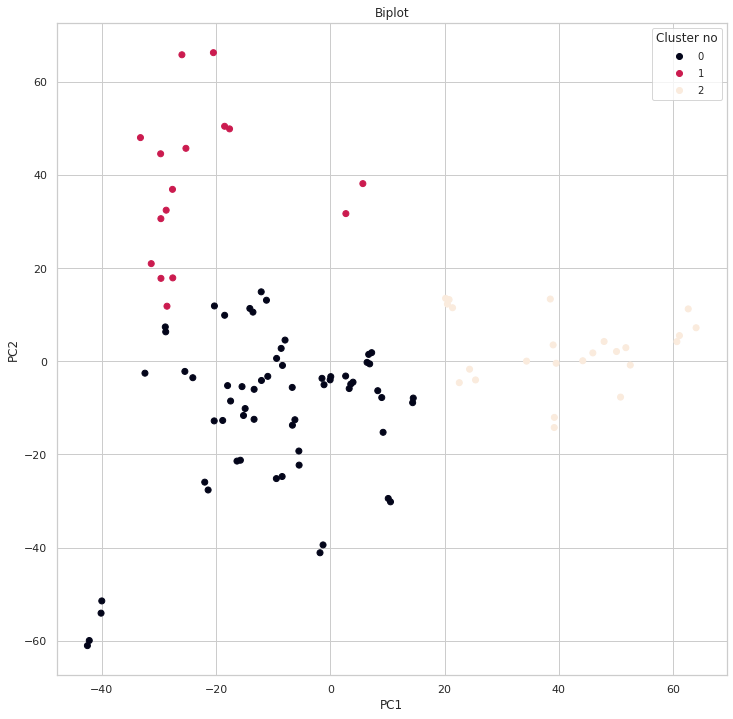

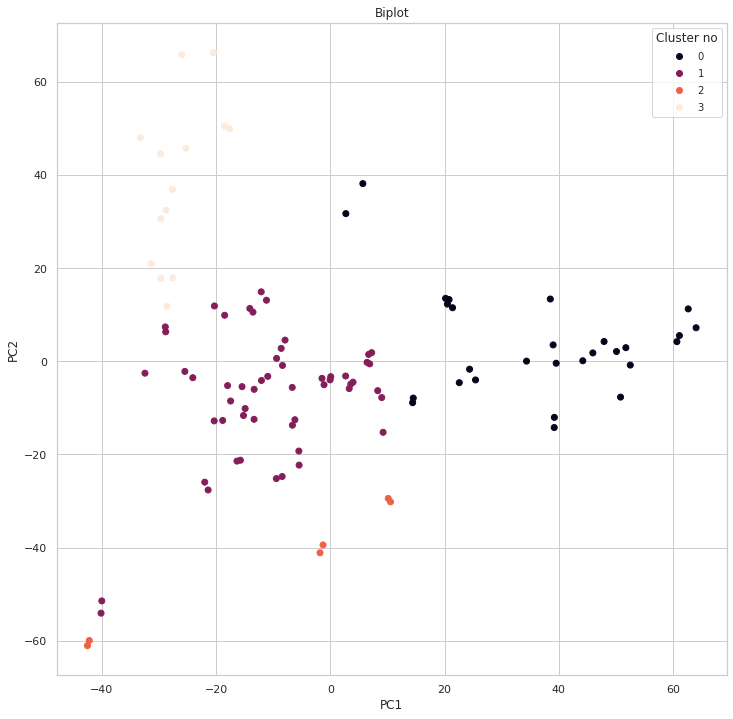

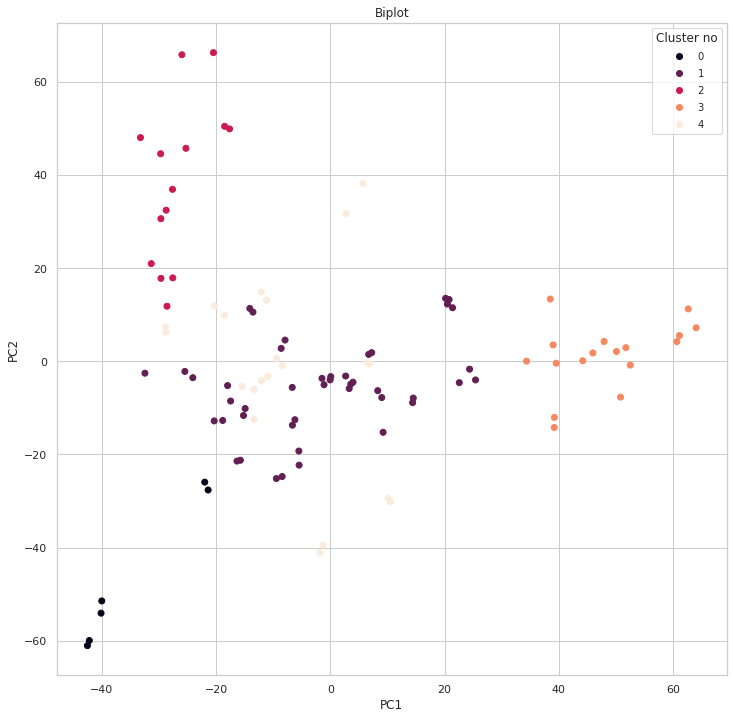

In [9]:
from sklearn.cluster import KMeans
data_norm = pd.DataFrame(stats.zscore(data, axis = 1), index = data.index, columns = data.columns)
X=data_norm.T.values
#i=5
for i in range(1,6,1):
    no_clusters= i
    kmeans = KMeans(n_clusters=no_clusters, random_state=0).fit(X)
#     print(kmeans.labels_)
    #clust_center=kmeans.cluster_centers_
    #print(clust_center)
    pca=PCA()
    prin_comp=pca.fit_transform(X)
    X_pc1=prin_comp[:,0]
    Y_pc2=prin_comp[:,1]
    Colour_clusters=kmeans.labels_
    
    
    fig,ax = plt.subplots(figsize=(12,12))
    plt.title("Biplot")
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    scatter = ax.scatter(X_pc1, Y_pc2, c=Colour_clusters)

    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster no",prop={'size': 10})


plt.show()





From the heatmaps shown in part 2c, we can analyse in 2 ways: 
Vertical analysis , comparing how the conditions cluster in how many types of clusters vs the change in the amount of total clusters, we observe that the Acid/Base/Ompr almost always cluster in a single cluster even when we change the total amount of clusters. This denotes that the expression of genes depend on the pH of the medium almost always and it seems like it doesn't matter how much absolute value of the pH is, just the nature of acidic/basic. The horizontal analysis gives us a surprising finding that the acid and base conditions are almost always linked to the same cluster, and since similar clusters means similar conditions for expression, we can change our view to acid and base conditions although being similar amongst themselves, are similar to each other indicating that it doesn't matter what the condition is. But we must keep in mind that this reasoning might not be right since our silhoutte coefficient is too low. 

## 2. Cluster evaluation

These references may be helpful in answering this question: 
- https://www-users.cs.umn.edu/~hanxx023/dmclass/cluster_survey_10_02_00.pdf
- https://www.nature.com/articles/nmeth.4299)

### A. Method descriptions

There are many approaches to evaluate how well your data clusters (e.g. a simple method is to order samples by clusters and simply visualize the similarity matrix). Discuss how the following methods can be used to validate/evaluate cluster (Note: They do not all serve the same purpose):

A) Silhouette coefficient

Silhoutte coefficient gives us an estimate of how well our clustering has worked. It is a measure of the distance of the point in one cluster to  its own cluster as opposed to its neighbouring clusters. A high value of +1 indicates that it is near to points in its own cluster as opposed to neighbouring clusters. A value of zero indicates that it is close to neighbouring points of a different cluster and and negative value indicates that proabably clustering is wrong since it implies that points in one cluster is close to points on other clusters vs its own clusters. 

B) Resampling of data (bootstrapping/cross-validation)

Resampling of data involves using the original data to pick(by replacement) as the basis from which multiple samples will be drawn. It creates an unique distribution of our data based on the original dataset. This also creates unbiased estimates of the orginal dataset. This resampling technique to remove biases in our data assumes that there is no paramteric distibution of the data to calculate the test statistic. The work flow of how this process is used to evaulate clustering is as follows:
1)Stability is calulated for each of the bootstrapping experiments 2) Consensus Parition is chosen that best represents all the resamples3)We then try to maximise the partition stability score by changing the number of clusters. 




C) Ensemble modeling


Ensemble modelling applications in unsupervised learning is known as consensus clustering. The consensus clustering algorithm provides a consensus across multiple runs of the clustering technique, which can be through different types of techniques like k means or DBSCAN for calculating how much clusters should be selected for maximising the stability of the discovered clusters. 






### B. How can the ‘elbow method’ be applied in conjunction with any of the above clustering evaluation methods to select the number of clusters?

The elbow method gives an account for how much percentage variance is accounted by how many clusters. After doing any of the above clustering evalution approaches, one can do the elbow method as a final test. If there is a kink or an elbow in the graph, it denotes that at that particular cluster value, there is a difference between the previous value and the next cluster value, and also it indicates that our curve is starting to plateau, and further increasing computational costs and time might not convert into equivalent increase in accuracy, so that particular value of cluster is chosen.  

### C. Calculate and interpret the silhouette coefficients after clustering your data using k-means clustering with k = 5.

For k=5 we see that the overall silhouette coefficient is 0.17261639083528815. From the swarm plots we see that the silhouette scores are very low , and cluster 1 shows the highest values among all the clusters average silhouette sample score. This may be due to the reason that at that particular classification of clusters,  all the acid and base conditions exclusively belong in that cluster. We see that since the overall value is very low, it indicates that our clustering is not done properly, which may be due to the type of distrubution of the underlying data, it may be a density based distribution hence difficult to estimate by a centroid based k mean appraoch. Also the euclidean distance metric might be wrong assumption, it may be better to assume a minkowski distance.  

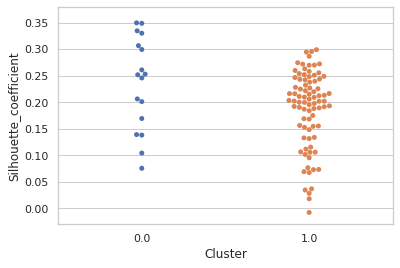

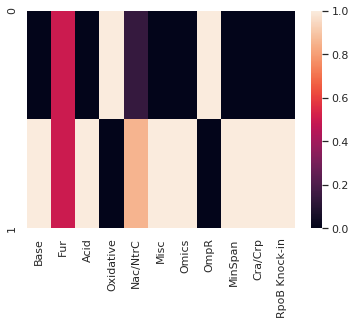

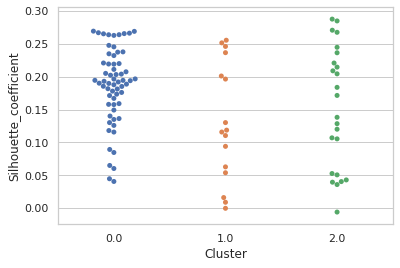

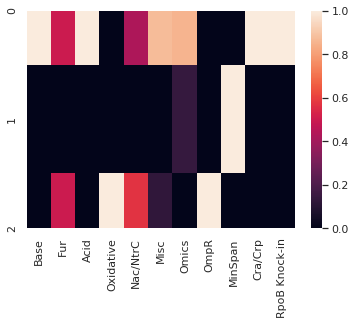

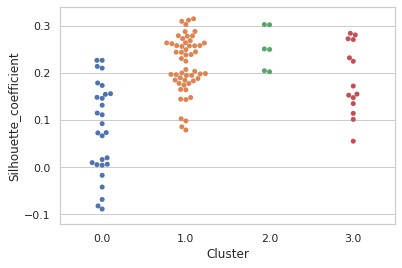

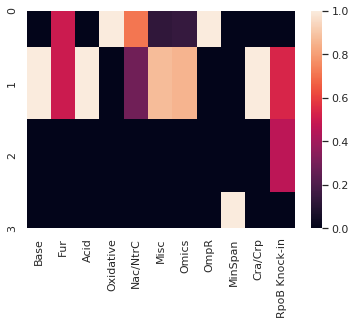

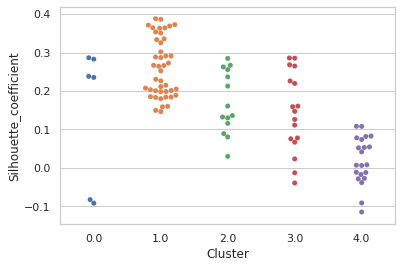

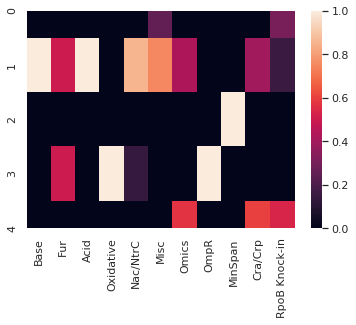

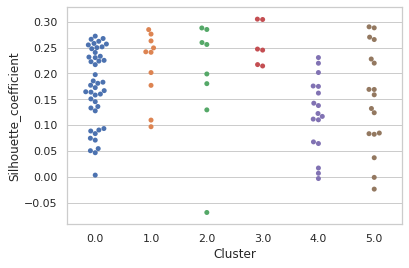

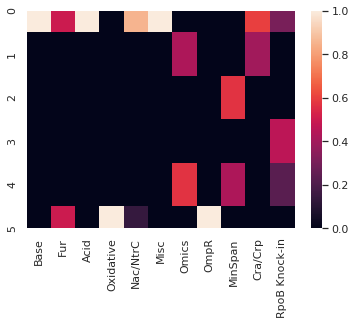

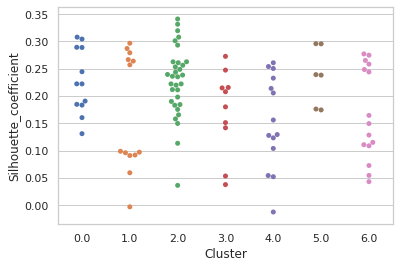

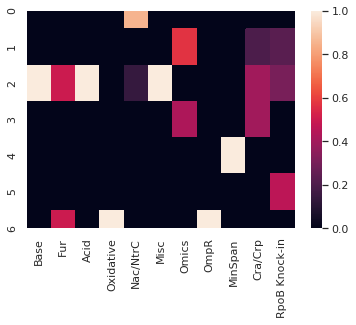

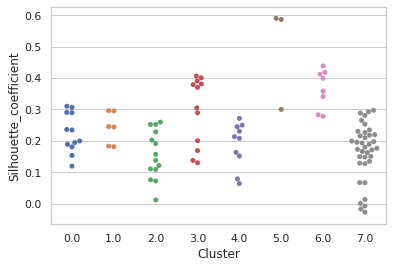

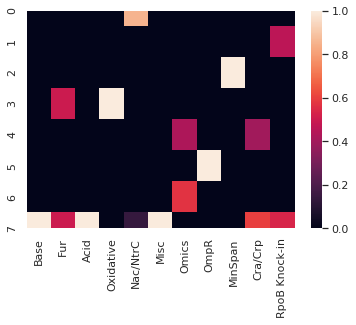

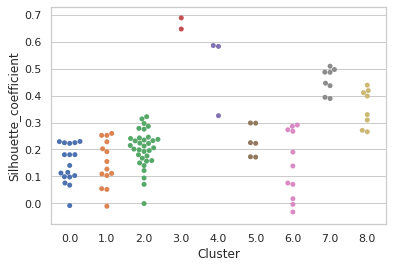

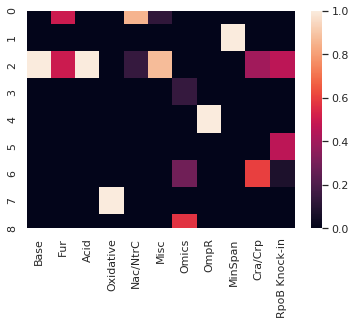

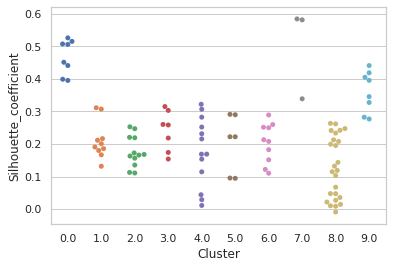

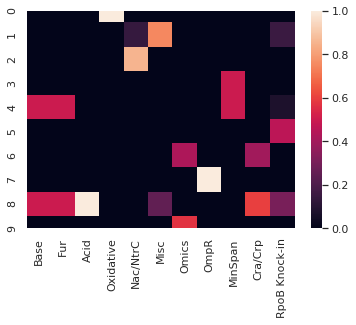

In [11]:
# Method to visualize 
# Through swarm plots
from sklearn.metrics import silhouette_samples, silhouette_score
# range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for no_clusters in range_n_clusters:

    kmeans= KMeans(n_clusters=no_clusters,random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # cluster_labels.reshape(102,1)
    # sample_silhouette_values.reshape(102,1)
    # print((cluster_labels.shape))
    # print((sample_silhouette_values.shape))

    Matrix_cluster_silhouette=np.zeros((cluster_labels.size , 2))
    Matrix_cluster_silhouette[:,0]=cluster_labels
    Matrix_cluster_silhouette[:,1]=sample_silhouette_values



    Matrix_cluster_silhouette_pd=pd.DataFrame(Matrix_cluster_silhouette,columns=['Cluster','Silhouette_coefficient'])
#     print(Matrix_cluster_silhouette_pd)
    plt.figure(no_clusters)
    swarm_cluster = sns.swarmplot(x="Cluster", y="Silhouette_coefficient", data=Matrix_cluster_silhouette_pd)
    plt.show()
    conditions=metadata['Study'].unique()

    index_matrix=np.zeros((conditions.size,20))

      # calculating the heat map which is a matrix which has the dimensions of no of clusters cross the no of unique conditions
# in the metadata datdframe

    # Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,index=No_clusters, columns=conditions)
#   
    for j in range(0,conditions.size):
        k=0
        for i in range(0,cluster_labels.size):
            if metadata.iloc[i,0]==conditions[j]:
                index_matrix[j,k]=i+1
                k+=1
                
# Now we traverse the array of a matrix which is cluster x conditions(the final matrix) which is by default zero and each match 
# adds an 1 at that particular row, like if condition = base has a cluster at cluster 1 then it's default value is changed by one. 
#repeated iteratively for all elements in our matrix

    Matrix_Clusters_Conditions=np.zeros((no_clusters,conditions.size))

    for l in range(0,conditions.size):
        for m in range(0,20):
            if index_matrix[l,m]!=0:
                for n in range(0,no_clusters):
                    if cluster_labels[int(index_matrix[l,m])-1]==(n):
                        Matrix_Clusters_Conditions[n,l]+=1
                        break


    Matrix_Clusters_Conditions_Sum=np.sum(Matrix_Clusters_Conditions,axis=0)

    # Making into fraction 
    for j in range(0,conditions.size):
        Matrix_Clusters_Conditions[:,j]=Matrix_Clusters_Conditions[:,j]/Matrix_Clusters_Conditions_Sum[j]
    #transfering the data into a proper dataframe  

    Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,columns=conditions)

    Matrix_Clusters_Conditions_pd=pd.DataFrame(Matrix_Clusters_Conditions,columns=conditions)
    plt.figure(no_clusters)
    ax = sns.heatmap(Matrix_Clusters_Conditions_pd)

